# Expolatory Data Analysis: Univariate Analysis

## 1)Defining the question

### a) Specifying the Data Analytic question

to determine which individuals are most likely to have or use a bank account.

### b) Defining the metric for success

### c) Understanding the context

### d) Recording the Experimental design

### e) Data Relevance

## 2) Reading the Data

In [1]:
# Loading the Data from the source 
# Dataset url = http://bit.ly/FinancialDataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

financial_dataset_df = pd.read_csv('http://bit.ly/FinancialDataset')


## 3) Checking the Data

In [2]:
# Determining the no. of records in our dataset
financial_dataset_df.shape

(23524, 13)

In [3]:
# Previewing the top of our dataset
financial_dataset_df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [4]:
# Previewing the bottom of our dataset
financial_dataset_df.tail(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [5]:
# Checking whether each column has an appropriate datatype
financial_dataset_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4) External Data Source Validation

## 5) Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


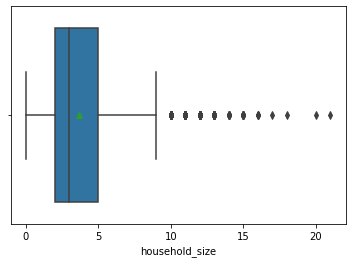

In [6]:
# Checking for Outliers
sns.boxplot(financial_dataset_df['household_size'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


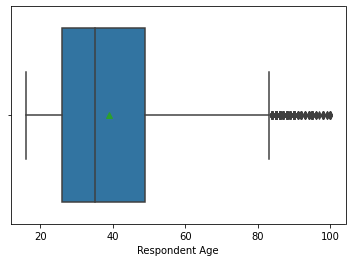

In [8]:
# Checking for Outliers
#financial_dataset_df.boxplot(['Respondent Age'])
sns.boxplot(financial_dataset_df['Respondent Age'], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


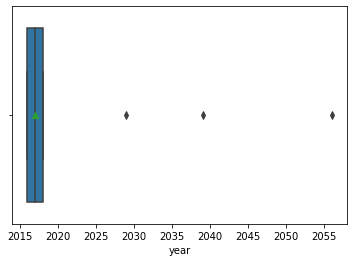

In [21]:
# Checking outliers for year
sns.boxplot(financial_dataset_df['year'], showmeans=True)

In [11]:
# Checking for Anomalies
q1_household = financial_dataset_df['household_size'].quantile(.25)
q3_household = financial_dataset_df['household_size'].quantile(.75)

iqr_household = q3_household - q1_household
print(iqr_household)

l_bound = q1_household - (1.5*iqr_household)
u_bound = q3_household + (1.5 * iqr_household)
print(l_bound, u_bound)


3.0
-2.5 9.5


In [12]:
# Checking for Anomalies
q1_Age = financial_dataset_df['Respondent Age'].quantile(.25)
q3_Age = financial_dataset_df['Respondent Age'].quantile(.75)

iqr_Age = q3_Age - q1_Age
print(iqr_Age)

l_bound = q1_Age - (1.5*iqr_Age)
u_bound = q3_Age + (1.5 * iqr_Age)
print(l_bound, u_bound)

23.0
-8.5 83.5


In [30]:
# Checking for Anomalies
q1_year = df_financial['year'].quantile(.25)
q3_year = df_financial['year'].quantile(.75)

iqr_year = q3_year - q1_year
print(iqr_year)

l_bound = q1_year - (1.5*iqr_year)
u_bound = q3_year + (1.5 * iqr_year)
print(l_bound, u_bound)


# removing the year outliers and anomalies
financial_df = df_financial[(df_financial['year'] >= 2016) & (df_financial['year'] <= 2018)]
financial_df

2.0
2013.0 2021.0


,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [36]:
# Identifying the Missing Data
financial_dataset_df.isnull().values.any()
financial_dataset_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [18]:
# Dropping null values
df_financial = financial_dataset_df.dropna()
df_financial.isnull().values.any()


False

In [22]:
# identifying and dropping duplicates
df_financial.duplicated().sum()

0

In [37]:
# confirming no null values present
financial_df.isnull().values.any()

False

## 6) Exploratory Analysis

In [38]:
#preview of the dataset
financial_df.head(5)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [31]:
# Ploting the univariate summaries and recording our observations
#
financial_df.describe(include='all')

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
count,23340,23340.000000,23340,23340,23340,23340,23340.000000,23340.000000,23340,23340,23340,23340,23340
unique,4,NaN,8687,2,2,2,NaN,NaN,2,6,5,7,10
top,Rwanda,NaN,uniqueid_980,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8683,NaN,4,20044,14263,17331,NaN,NaN,13766,12729,10698,12688,6361
mean,NaN,2016.977464,NaN,NaN,NaN,NaN,3.688560,38.807069,NaN,NaN,NaN,NaN,NaN
std,NaN,0.849136,NaN,NaN,NaN,NaN,2.281275,16.519905,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,0.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [72]:
# replacing the values of yes and no in the 'has a bank account' with binary and 
#financial_df['Has a Bank account'].replace(to_replace=['Yes', 'No'], value=[0, 1])
financial_df['gender_of_respondent'].replace(to_replace=['Female', 'Male'], value=[0, 1])
financial_df['Has a Bank account'] = financial_df['Has a Bank account'].replace({'No': 0, 'Yes': 1})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [73]:
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [74]:
financial_df.to_csv("financial dataset.csv")

In [4]:
financial_df = pd.read_csv('/content/financial dataset.csv', index_col=0)
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# creating a frequency table of the country and the column 'has abank account'
financial_df.country.value_counts()


Rwanda      8683
Tanzania    6500
Kenya       6062
Uganda      2095
Name: country, dtype: int64

<BarContainer object of 23340 artists>

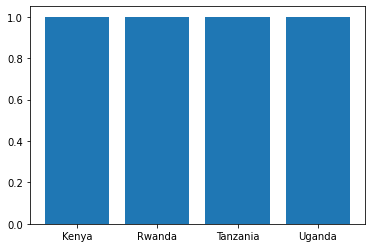

In [8]:
# plotting a bar graph to show distribution of who have bank accounts in the different countries
country = financial_df['country']
Bank_account = financial_df['Has a Bank account']

plt.bar(country, Bank_account)

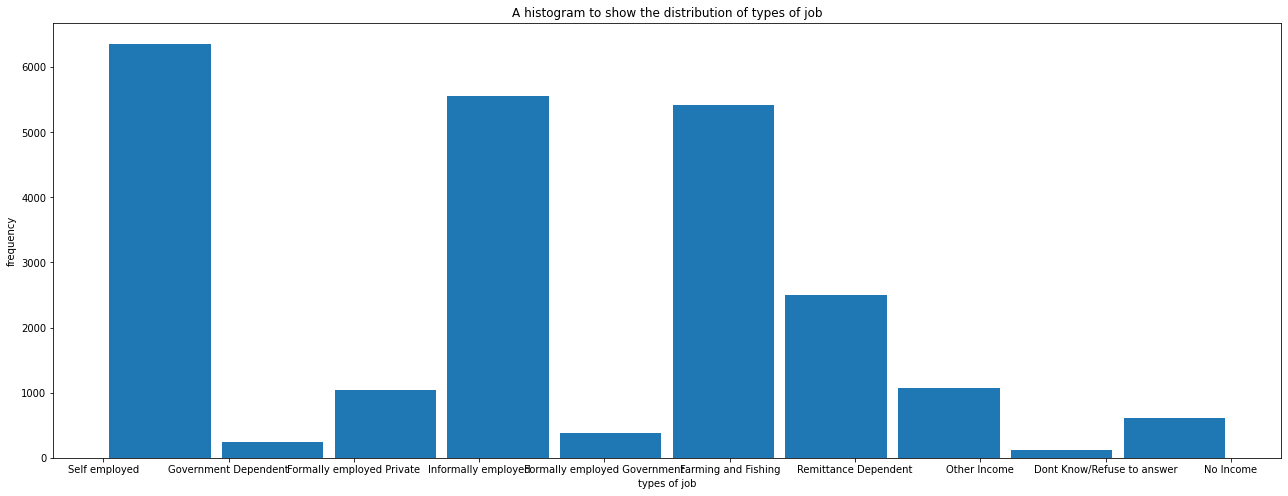

In [53]:
#Histogram
fig = plt.figure(figsize=(22,8))

Job = financial_df['Type of Job']
plt.hist(Job, bins=10, histtype='bar', rwidth=0.9)
plt.title('A histogram to show the distribution of types of job')
plt.xlabel('types of job')
plt.ylabel('frequency')
plt.show()

# The most popular forms of employement are self employement, informally employed and farming and fishing respectively. The least popular type of employement is Government dependent. 

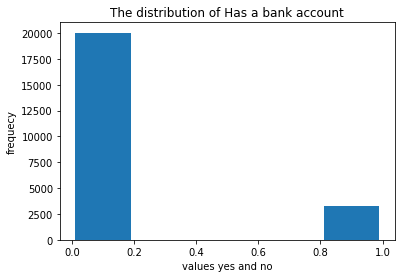

In [19]:
plt.hist(Bank_account, bins=5, histtype='bar', rwidth=0.9)
plt.title('The distribution of Has a bank account')
plt.xlabel('values yes and no')
plt.ylabel('frequecy')
plt.show()

# most people dont have bank accounts compared to the ones who have.
# recall 1 was encoded to represent yes and 0 was encoded to represent no 

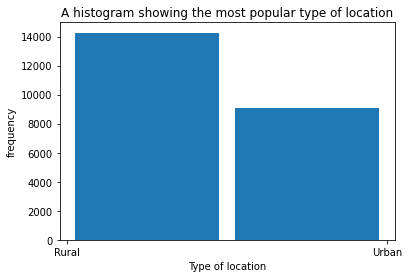

In [41]:
# most popular type of location
location = financial_df['Type of Location']
plt.hist(location, bins=2, histtype='bar', rwidth=0.9)
plt.title('A histogram showing the most popular type of location')
plt.xlabel('Type of location')
plt.ylabel('frequency')
plt.show()

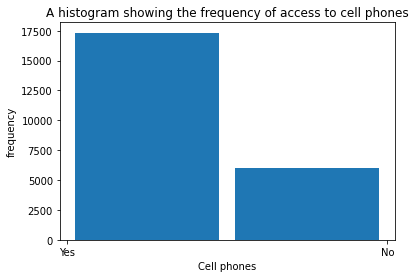

In [57]:
Cell_phone = financial_df['Cell Phone Access']
plt.hist(Cell_phone, bins=2, histtype='bar', rwidth=0.9)
plt.title('A histogram showing the frequency of access to cell phones')
plt.xlabel('Cell phones')
plt.ylabel('frequency')
plt.show()

### Measures of Central Tendancy

In [30]:
# The mean age
financial_df['Respondent Age'].mean()

38.80706940874036

In [31]:
# The mean of Households
financial_df['household_size'].mean()

3.688560411311054

In [32]:
# median of age
financial_df['Respondent Age'].median()

35.0

In [34]:
# median of households
financial_df['household_size'].median()

3.0

In [35]:
# mode of age
financial_df['Respondent Age'].mode()

0    30.0
dtype: float64

In [37]:
# mode of households
financial_df['household_size'].mode()

0    2.0
dtype: float64

In [38]:
# mode of has a bank account
financial_df['Has a Bank account'].mode()


# from this we see that most people did not have bank accounts

0    0
dtype: int64

### Measures of Dispersion/Variability/Spread

In [54]:
# The correlation between the different variable is the dataset
financial_df.corr()

,year,Has a Bank account,household_size,Respondent Age,gender_of_respondent
year,1.000000,0.112622,-0.052484,-0.018554,-0.000024
Has a Bank account,0.112622,1.000000,-0.023056,0.019601,0.116058
household_size,-0.052484,-0.023056,1.000000,-0.119671,0.010070
Respondent Age,-0.018554,0.019601,-0.119671,1.000000,0.013373
gender_of_respondent,-0.000024,0.116058,0.010070,0.013373,1.000000


In [55]:
financial_df.kurt()

year                   -1.611829
Has a Bank account      2.246487
household_size          1.153836
Respondent Age          0.098268
gender_of_respondent   -1.866809
dtype: float64

In [56]:
financial_df.skew()

year                    0.042833
Has a Bank account      2.060654
household_size          0.974183
Respondent Age          0.840615
gender_of_respondent    0.365173
dtype: float64

## 7) Implementing Solution

To answe the defined question, I have done analysis above and found out that the most likely people to have or use a bank account are the people who have employement and in urban areas. Some factors like marital status were not really relevant.


## 8) Challenging the Solution

The data provided could have been more numerical to ease the calculations. The analysis could have been more effective.
Most of the people without bank accounts were from the rural areas which shows that they need to educated on the importance using banks for saving and etc.


# Expolatory Data Analysis: Bivariate Analysis 

### Scatter Plots

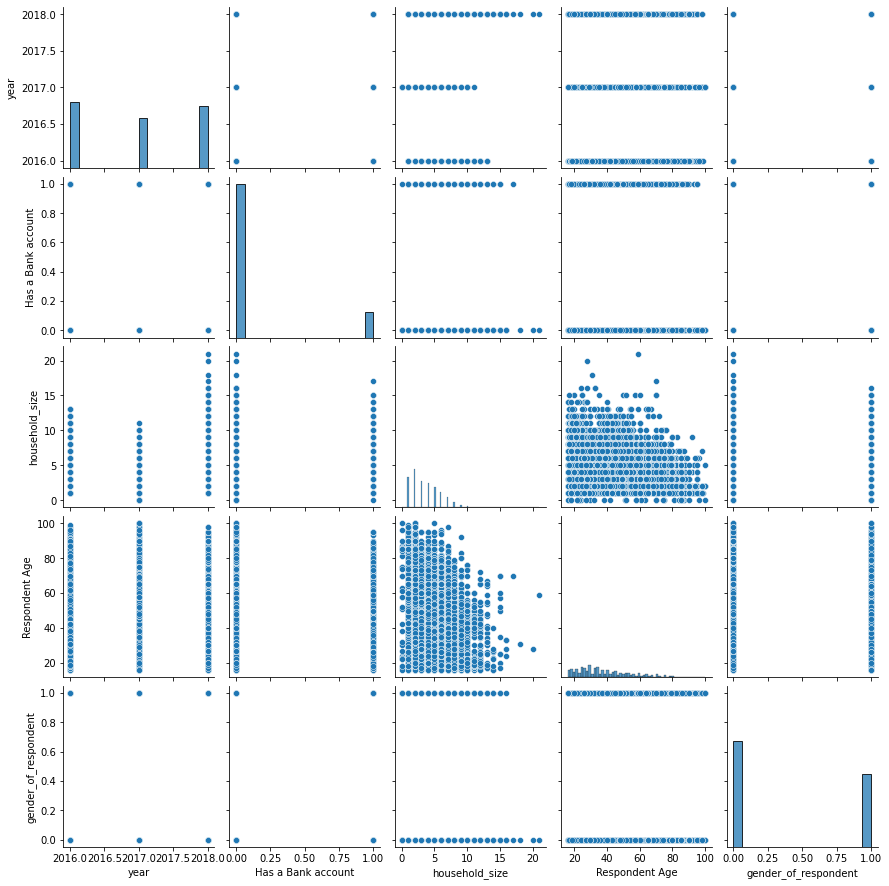

In [76]:
# Ploting the bivariate summaries and recording our observations
sns.pairplot(financial_df)
plt.show()

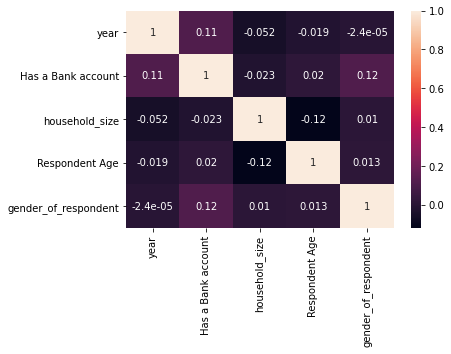

In [58]:
sns.heatmap(financial_df.corr(),annot=True)
plt.show()

In [59]:
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,1,Rural,Yes,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,0,Rural,No,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,1,Urban,Yes,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,0,Rural,Yes,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,0,Urban,No,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


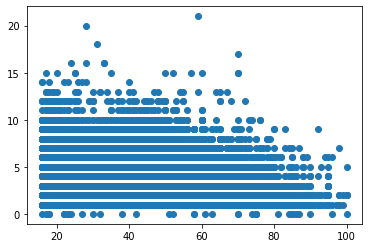

In [90]:
# Scatter plot
plt.scatter(financial_df["Respondent Age"] , financial_df["household_size"])

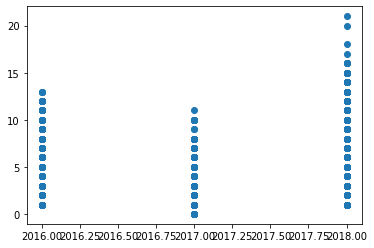

In [67]:
# Scatter plot
plt.scatter(financial_df['year'], financial_df['household_size'])

### Correlation

In [68]:
# Correlation coefficients between -.20 and .20 are generally considered weak, 
# between .20 and .50 (positive or negative) are considered moderate, 
# and above .50 (positive or negative) are considered strong. 

# Correlation between the age and having a bank account
financial_df["Respondent Age"].corr(financial_df["Has a Bank account"], method="pearson") 

#they are positively weakly correlated

0.019601315905266665

In [70]:
# correlation between households and having a bank account
financial_df["household_size"].corr(financial_df["Has a Bank account"], method="pearson")

#they are negatively weakly correlated

-0.02305563551779525

In [72]:
# Different forms of correlation between different variables
financial_df.corr()



,year,Has a Bank account,household_size,Respondent Age,gender_of_respondent
year,1.000000,0.112622,-0.052484,-0.018554,-0.000024
Has a Bank account,0.112622,1.000000,-0.023056,0.019601,0.116058
household_size,-0.052484,-0.023056,1.000000,-0.119671,0.010070
Respondent Age,-0.018554,0.019601,-0.119671,1.000000,0.013373
gender_of_respondent,-0.000024,0.116058,0.010070,0.013373,1.000000


### Stacked Column Charts

### Line Charts

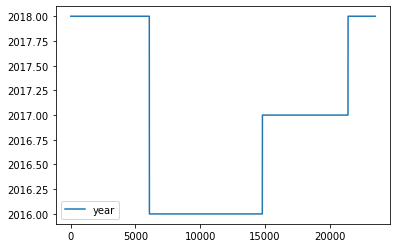

In [87]:
financial_df[["year"]].plot()
#plt.plot(year, Respondent Age)

## Implementing Solution

To answe the defined question, I have done analysis above and found out that the most likely people to have or use a bank account are the people who have employement and in urban areas. Some factors like marital status were not really relevant.